In [21]:
# import libraries
import os, re, pandas as pd
from os import listdir, walk

In [13]:
# constants
_COL_NAMES = ['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']
_LOCAL_HOME_DIR = "/home/jon/Workspace/StocksAnalysis/"

In [14]:
# load sample data
sample_fpath = _LOCAL_HOME_DIR + "Data/2020jan/20200102.txt"
sample_df = pd.read_csv(sample_fpath, header=0, names=_COL_NAMES)
sample_df

,Ticker,Date,Open,High,Low,Close,Volume
0,14D,20200102,0.195,0.220,0.195,0.220,71258
1,1ST,20200102,0.078,0.078,0.075,0.075,63333
2,2BE,20200102,0.130,0.130,0.130,0.130,1757
3,3DA,20200102,0.340,0.350,0.335,0.350,341363
4,3DP,20200102,0.055,0.058,0.055,0.058,283454
...,...,...,...,...,...,...,...
1546,XTJ,20200102,1257.500,1277.800,1257.500,1271.000,0
1547,XTL,20200102,3673.500,3683.600,3663.100,3672.000,0
1548,XTO,20200102,5541.800,5562.800,5529.400,5546.900,0
1549,XUJ,20200102,8157.000,8194.400,8147.700,8159.900,0


In [49]:
# load data
data_dir_path = _LOCAL_HOME_DIR + "/Data/"

# list all file names
fpath_l = []
for (dirpath, dirnames, filenames) in walk(data_dir_path):
    fpath_l.extend([os.path.join(dirpath, fname) for fname in filenames if re.search(".txt", fname) != None])

# load all files
load_df_l = []
for fpath in fpath_l:
    load_df_l.append(pd.read_csv(fpath, header=0, names=_COL_NAMES))
df = pd.concat(load_df_l, axis=0, ignore_index=True)

# prepare data
df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")

#show dataframe
df.head(10)

,Ticker,Date,Open,High,Low,Close,Volume
0,14D,20190822,0.250,0.255,0.235,0.235,266872
1,1AD,20190822,0.125,0.130,0.125,0.125,279229
2,1AG,20190822,0.036,0.037,0.036,0.037,146003
3,1ST,20190822,0.076,0.076,0.070,0.073,854011
4,2BE,20190822,0.320,0.320,0.310,0.310,13276
5,3DP,20190822,0.040,0.040,0.039,0.039,143001
6,3PL,20190822,0.985,0.995,0.980,0.980,28917
7,4CE,20190822,0.020,0.020,0.019,0.020,817685
8,4DS,20190822,0.052,0.053,0.051,0.052,1124047
9,5GN,20190822,1.030,1.030,0.980,0.985,238290


In [64]:
# ASX:WOW
wow_df = df.copy()[df['Ticker'] == 'WOW']
wow_df.set_index('Date', inplace=True)
wow_df.sort_index(inplace=True)
wow_df.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02,WOW,29.40,29.58,29.25,29.52,1425178
2013-01-03,WOW,29.37,29.59,29.33,29.54,1610014
2013-01-04,WOW,29.60,29.64,29.45,29.55,1032191
2013-01-07,WOW,29.70,29.70,29.46,29.51,1601160
2013-01-08,WOW,29.51,29.68,29.38,29.44,3035287


<AxesSubplot:xlabel='Date'>

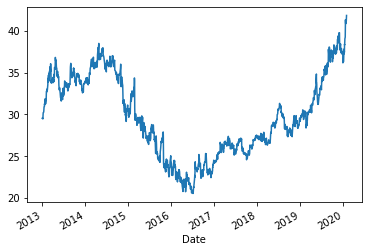

In [59]:
# Plot average close price
wow_df['Close'].plot()

<AxesSubplot:xlabel='Date'>

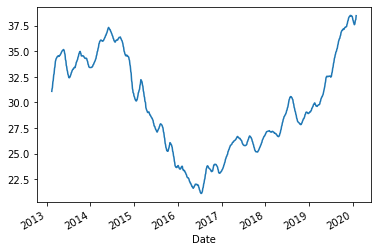

In [65]:
# Plot 30 day moving average close price
wow_df['Close30ma'] = wow_df['Close'].rolling(30).mean()
wow_df['Close30ma'].plot()

In [68]:
# Watchlist
watchlist = ['WOW','VAS','VHY','NXT']
watchlist_df = df.copy()[df['Ticker'].isin(watchlist)]
watchlist_df.head()
watchlist_df.set_index('Date', inplace=True)
watchlist_df.sort_index(inplace=True)
watchlist_df.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02,VHY,54.70,54.770,54.390,54.71,14157
2013-01-02,NXT,1.85,1.900,1.835,1.85,105360
2013-01-02,WOW,29.40,29.580,29.250,29.52,1425178
2013-01-02,VAS,60.10,60.250,59.400,59.93,16378
2013-01-03,NXT,1.87,1.905,1.850,1.88,65574


<AxesSubplot:xlabel='Date'>

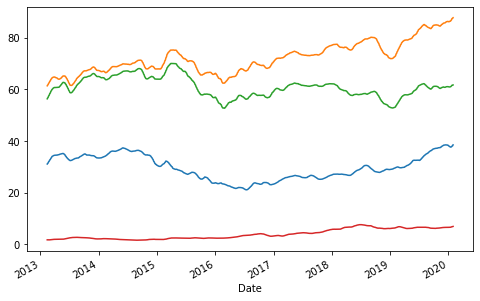

In [78]:
# Plot 30 day moving average close price (watchlist)
graph_watchlist_df = pd.DataFrame()

for ticker in watchlist:
    ticker_df = watchlist_df.copy()[watchlist_df['Ticker'] == ticker]
    ticker_df[f"{ticker}_30ma"] = ticker_df['Close'].rolling(30).mean()
    if graph_watchlist_df.empty:
        graph_watchlist_df = ticker_df[[f"{ticker}_30ma"]]
    else:
        graph_watchlist_df = graph_watchlist_df.join(ticker_df[f"{ticker}_30ma"])
        
graph_watchlist_df.dropna(inplace=True)
graph_watchlist_df.plot(figsize=(8,5), legend=False)